In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [11]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# DATA CLEANING

In [12]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

TO RENAME COLUMN NAMES

In [13]:
df.rename(columns={'v1':'Res','v2':'Text'},inplace=True)

In [14]:
df.head()

,Res,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [17]:
df['Res']=label_encoder.fit_transform(df['Res'])

In [18]:
df.sample(4)

,Res,Text
1276,0,Can do lor...
786,0,It does it on its own. Most of the time it fix...
1268,1,Can U get 2 phone NOW? I wanna chat 2 set up m...
5505,0,What i told before i tell. Stupid hear after i...


In [19]:
df.duplicated().sum()

403

Removing Duplicates

In [21]:
df=df.drop_duplicates(keep='first')

In [22]:
df.shape

(5169, 2)

# EXPLORATORY DATA ANLYSIS

In [24]:
df['Res'].value_counts()

0    4516
1     653
Name: Res, dtype: int64

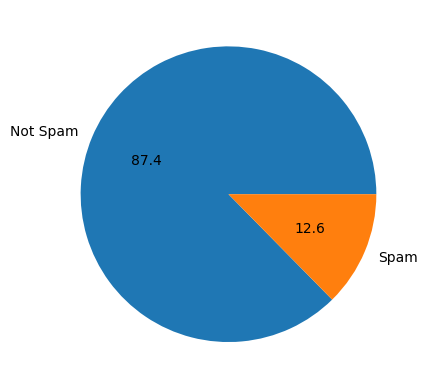

In [27]:
plt.pie(df['Res'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.1f")
plt.show()

# MAKING THREE NEW COLUMNS FOR NO> OF CHARACTERS , WORDS AND SENTENCES USING NLTK LIBRARY OF PYTHON

In [28]:
!pip install nltk

In [30]:
import nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
df['chars']=df['Text'].apply(len)

In [33]:
df.sample(3)

,Res,Text,chars
1614,0,Me sef dey laugh you. Meanwhile how's my darli...,55
1993,0,Eh den sat u book e kb liao huh...,34
745,0,Dunno he jus say go lido. Same time 930.,40


In [34]:
df['words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df.sample(3)

,Res,Text,chars,words
3930,0,Nooooooo I'm gonna be bored to death all day. ...,72,17
3458,1,Not heard from U4 a while. Call me now am here...,153,34
3984,0,"Whatever, juliana. Do whatever you want.",40,9


In [36]:
df['sen']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df.sample(3)

,Res,Text,chars,words,sen
2375,0,Thanx 4 2day! U r a goodmate I THINK UR RITE S...,95,25,4
3062,1,"Hi babe its Jordan, how r u? Im home from abro...",147,32,2
93,1,Please call our customer service representativ...,139,24,1


In [39]:
df.describe()

,Res,chars,words,sen
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [44]:
df[df['Res']==0][['chars','words','sen']].describe()

,chars,words,sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
df[df['Res']==1][['chars','words','sen']].describe()

,chars,words,sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [46]:
import seaborn as sns


<Axes: xlabel='chars', ylabel='Count'>

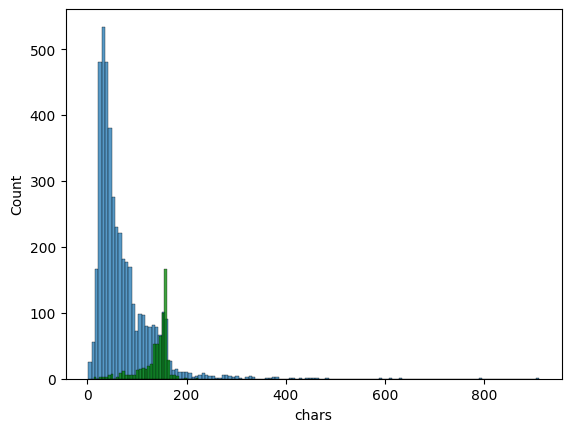

In [48]:
sns.histplot(df[df['Res']==0]['chars'])#FOR NOT SPAM
sns.histplot(df[df['Res']==1]['chars'],color='green')#FOR  SPAM


In [49]:
df.corr()['Res']

<ipython-input-49-9364f75a8245>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Res']


Res      1.000000
chars    0.384717
words    0.262912
sen      0.263939
Name: Res, dtype: float64

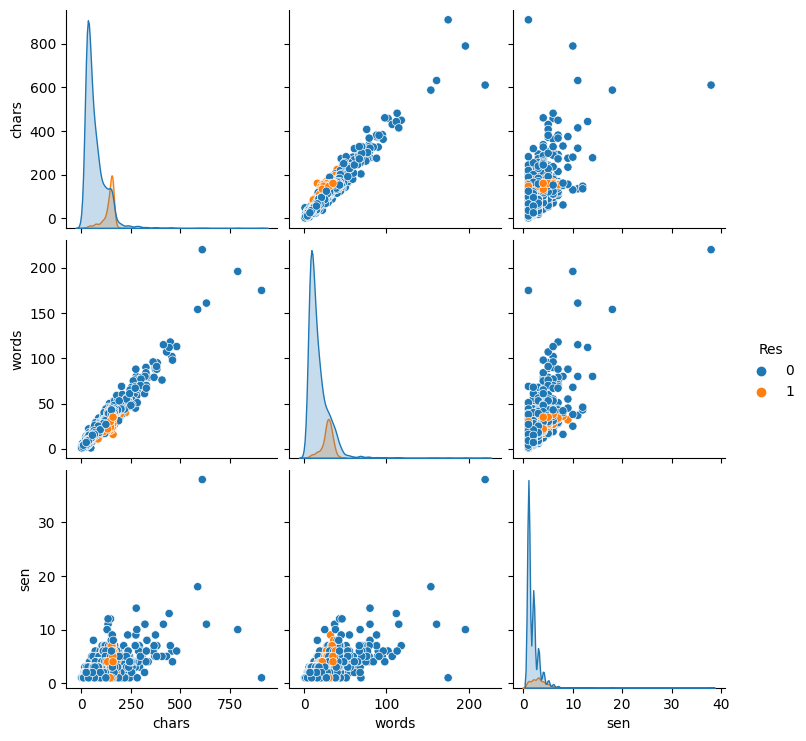

In [51]:
sns.pairplot(df,hue='Res')

<ipython-input-52-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

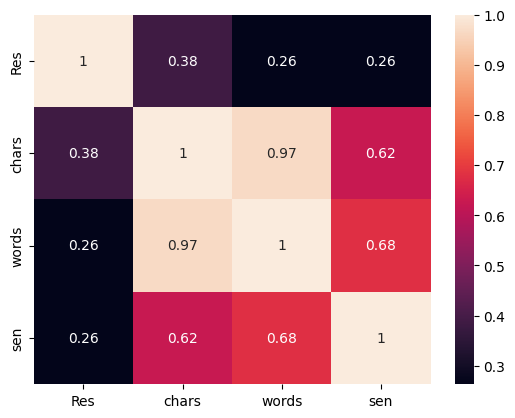

In [52]:
sns.heatmap(df.corr(),annot=True)

AS THE CHARACTER CORRELATION WITH THE RESULT IS 0.38 THATS THE MOST IMPORTANT PARAMETER IN THIS CASE HERE

# DATA PREPROCESSING

In [ ]:
#LOWER CASING THE TEXT and many other required transformations

In [59]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [63]:
import string
string .punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('cooking')

'cook'

In [64]:
def transform(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]#FOR REMOVING SPECIAL CHARACTERS
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:#FOR REMOVING STOP WORDS AND PUNCTUATION
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  #FOR STEMMING THAT IS CONSIDERING WORD ASV ITS ROOT FORM LIKE COOKING TO COOK COOKS TO COOK
  text=y[:]
  y.clear()

  for  i in text:
    y.append(ps.stem(i))

  return " ".join(y)

  return y

In [65]:
transform(
    'Hi how are you? I was Thinking of going to a party tomorrow with Rohit and Krish'
)

'hi think go parti tomorrow rohit krish'

In [66]:
df['Transformed_Text']=df['Text'].apply(transform)

In [68]:
df.sample(5)

,Res,Text,chars,words,sen,Transformed_Text
4972,0,Oops I was in the shower when u called. Hey a ...,142,31,4,oop shower u call hey park garag collaps unive...
4018,1,U've been selected to stay in 1 of 250 top Bri...,159,34,4,u select stay 1 250 top british hotel noth hol...
1575,0,"Sounds gd... Haha... Can... Wah, u yan jiu so ...",58,16,1,sound gd haha wah u yan jiu fast liao
4181,1,Urgent! Please call 0906346330. Your ABTA comp...,144,28,3,urgent pleas call abta complimentari 4 spanish...
3582,0,I sent your maga that money yesterday oh.,41,9,1,sent maga money yesterday oh


# FORMING WORDCLOUD OF SPAM AND NOT SPAM USING PREINSTALLED WORDCLOUD MODULE

In [71]:
from wordcloud import WordCloud
wc=WordCloud(width=600,height=600,min_font_size=10,background_color='black')

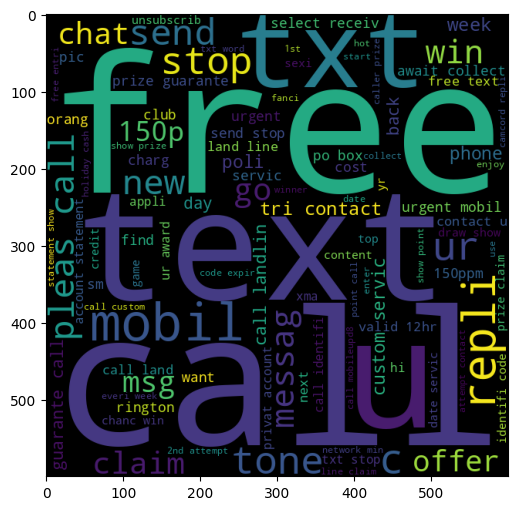

In [73]:
spam_wc=wc.generate(df[df['Res']==1]['Transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

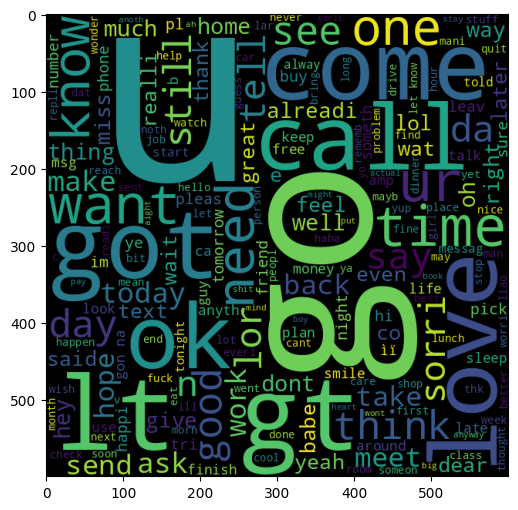

In [74]:
nspam_wc=wc.generate(df[df['Res']==0]['Transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(nspam_wc)

# FINDING THE TOP 30 WORDS OF SPAM AND NOT SPAM

In [75]:
spam_w = []
for msg in df[df['Res'] == 1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_w.append(word)

In [76]:
len(spam_w)

9939

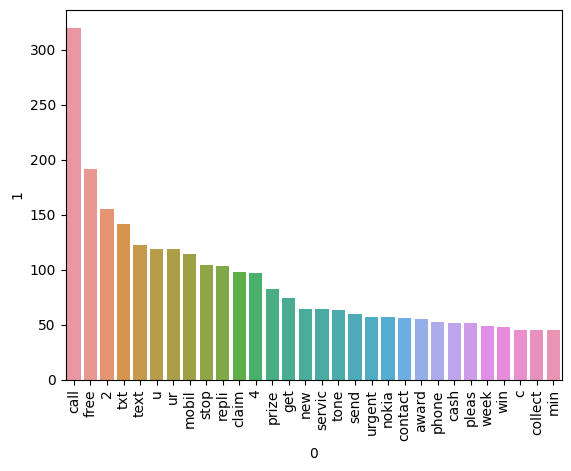

In [83]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_w).most_common(30))[0],y=pd.DataFrame(Counter(spam_w).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [84]:
nspam_w = []
for msg in df[df['Res'] == 0]['Transformed_Text'].tolist():
    for word in msg.split():
        nspam_w.append(word)

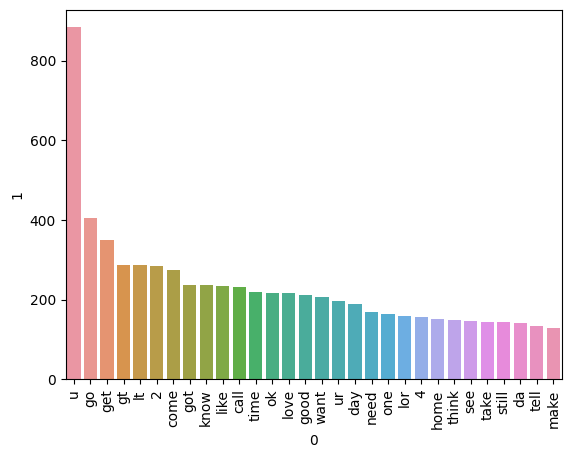

In [85]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(nspam_w).most_common(30))[0],y=pd.DataFrame(Counter(nspam_w).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING

NAIVE BAYES ALGO IS COMMOMLY USED FOR TEXTUAL ANALYSIS

In [86]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [87]:
X = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [88]:
X.shape

(5169, 3000)

In [89]:
y = df['Res'].values

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [92]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [93]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [94]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [95]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [96]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [107]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [108]:
clas = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [106]:
def train_classifier(cla,X_train,y_train,X_test,y_test):
    cla.fit(X_train,y_train)
    y_pred = cla.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [109]:
accuracy_scores = []
precision_scores = []

for name,cla in clas.items():

    current_accuracy,current_precision = train_classifier(cla, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [111]:
performance_df = pd.DataFrame({'Algorithm':clas.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [112]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


In [113]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [114]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [115]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [116]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [117]:
from sklearn.ensemble import StackingClassifier

In [118]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [119]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [120]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))